In [1]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('./data/processed/combined_hospital_data.csv')
df.head()

,facility_id,facility_name,address,citytown,state,zip_code,countyparish,telephone_number,payment_measure_id,payment_measure_name,...,count,results,schema,keys,format,rowIds,properties,city,name,rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dothan,Southeast Health Medical Center,70.0
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Southeast Health Medical Center,70.0
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eufaula,Southeast Health Medical Center,70.0
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geneva,Southeast Health Medical Center,70.0
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ozark,Southeast Health Medical Center,70.0


In [18]:
import re

for col in ['name', 'facility_name']:
    df[col] = df[col].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

In [13]:
len(df['facility_name'].unique()), len(df['name'].unique())

(195, 195)

In [20]:
len(df[df['facility_name'] != df['name']])

0

In [26]:
charges = pd.read_csv('./data/raw/charges_data.csv', encoding='latin1')
charges.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,25,158541.640000,37331.000000,35332.960000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,18,107085.333330,25842.666667,23857.944444
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,18,156326.777780,32167.888889,27662.944444
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,19,112085.263160,11568.473684,9993.473684
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,33,89068.212121,8199.818182,6086.393939


In [27]:
charges.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')

In [28]:
df.columns

Index(['facility_id', 'facility_name', 'address', 'citytown', 'state',
       'zip_code', 'countyparish', 'telephone_number', 'payment_measure_id',
       'payment_measure_name', 'payment_category', 'denominator', 'payment',
       'lower_estimate', 'higher_estimate', 'payment_footnote',
       'value_of_care_display_id', 'value_of_care_display_name',
       'value_of_care_category', 'value_of_care_footnote', 'start_date',
       'end_date', '6cfce155-48b6-579e-90ed-24016c759350', 'resources',
       'limit', 'offset', 'count', 'results', 'schema', 'keys', 'format',
       'rowIds', 'properties', 'city', 'name', 'rating'],
      dtype='object')

In [29]:
import pandas as pd


# Rename columns to align
df = df.rename(columns={
    'facility_id': 'Rndrng_Prvdr_CCN',
    'facility_name': 'facility_name_full',
    'citytown': 'facility_city',
    'state': 'facility_state',
    'zip_code': 'facility_zip'
})

# Make sure IDs are strings for joining
charges['Rndrng_Prvdr_CCN'] = charges['Rndrng_Prvdr_CCN'].astype(str)
df['Rndrng_Prvdr_CCN'] = df['Rndrng_Prvdr_CCN'].astype(str)

# Perform the join
merged_df = charges.merge(
    df,
    on='Rndrng_Prvdr_CCN',
    how='left',
    suffixes=('_provider', '_facility')
)

# Optional: if some are still unmatched, you could fuzzy match by name and zip
# (this would be a secondary step)

# Save the result
merged_df.to_csv('./data/processed/merged_healthcare_data.csv', index=False)
merged_df.head()


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,...,count,results,schema,keys,format,rowIds,properties,city,name,rating
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dothan,southeast health medical center,70.0
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,southeast health medical center,70.0
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eufaula,southeast health medical center,70.0
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geneva,southeast health medical center,70.0
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ozark,southeast health medical center,70.0


In [30]:
merged_df.shape

(522260, 50)

In [31]:
merged_df.columns

Index(['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City',
       'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs',
       'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt',
       'facility_name_full', 'address', 'facility_city', 'facility_state',
       'facility_zip', 'countyparish', 'telephone_number',
       'payment_measure_id', 'payment_measure_name', 'payment_category',
       'denominator', 'payment', 'lower_estimate', 'higher_estimate',
       'payment_footnote', 'value_of_care_display_id',
       'value_of_care_display_name', 'value_of_care_category',
       'value_of_care_footnote', 'start_date', 'end_date',
       '6cfce155-48b6-579e-90ed-24016c759350', 'resources', 'limit', 'offset',
       'count', 'results', 'schema', 'keys', 'format', 'rowIds', 'properties',
       'city', 'name', 'rating'],
      dt

In [40]:
merged_df['rating'].isna().value_counts()
merged_df['payment'].isna().value_counts()

payment
False    336535
True     185725
Name: count, dtype: int64

Dataset shape: (522260, 50)

Columns: ['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_Org_Name', 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_St', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc', 'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt', 'facility_name_full', 'address', 'facility_city', 'facility_state', 'facility_zip', 'countyparish', 'telephone_number', 'payment_measure_id', 'payment_measure_name', 'payment_category', 'denominator', 'payment', 'lower_estimate', 'higher_estimate', 'payment_footnote', 'value_of_care_display_id', 'value_of_care_display_name', 'value_of_care_category', 'value_of_care_footnote', 'start_date', 'end_date', '6cfce155-48b6-579e-90ed-24016c759350', 'resources', 'limit', 'offset', 'count', 'results', 'schema', 'keys', 'format', 'rowIds', 'properties', 'city', 'name', 'rating']

Missing values:
Avg_Submtd_Cvrd_Chrg: 0
rating: 214640

Filtered dataset s

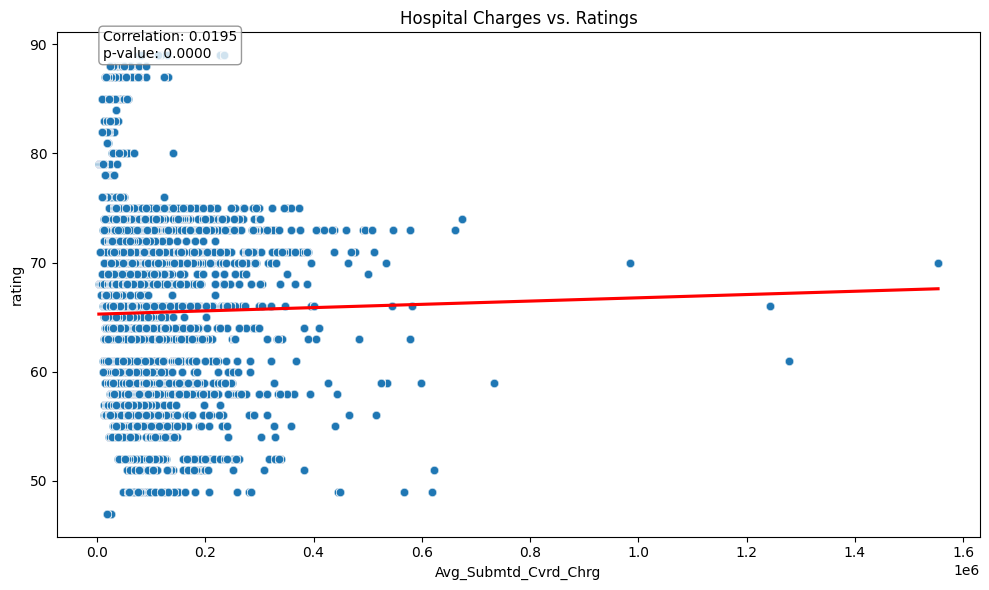

C:\Users\darsh\AppData\Local\Temp\ipykernel_21792\2125694630.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['charge_bin'] = pd.cut(filtered_df['Avg_Submtd_Cvrd_Chrg'], bins=bins, labels=labels)
C:\Users\darsh\AppData\Local\Temp\ipykernel_21792\2125694630.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_bin = filtered_df.groupby('charge_bin')['rating'].agg(['mean', 'count']).reset_index()



Average rating by charge bin:
              charge_bin       mean   count
0        $3,545-$175,761  65.315443  274420
1      $175,761-$347,978  65.973080   27192
2      $347,978-$520,194  67.850277    4328
3      $520,194-$692,411  65.718644    1180
4      $692,411-$864,627  59.000000      72
5    $864,627-$1,036,844  70.000000      60
6  $1,036,844-$1,209,060        NaN       0
7  $1,209,060-$1,381,276  63.090909     220
8  $1,381,276-$1,553,493  70.000000      92


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


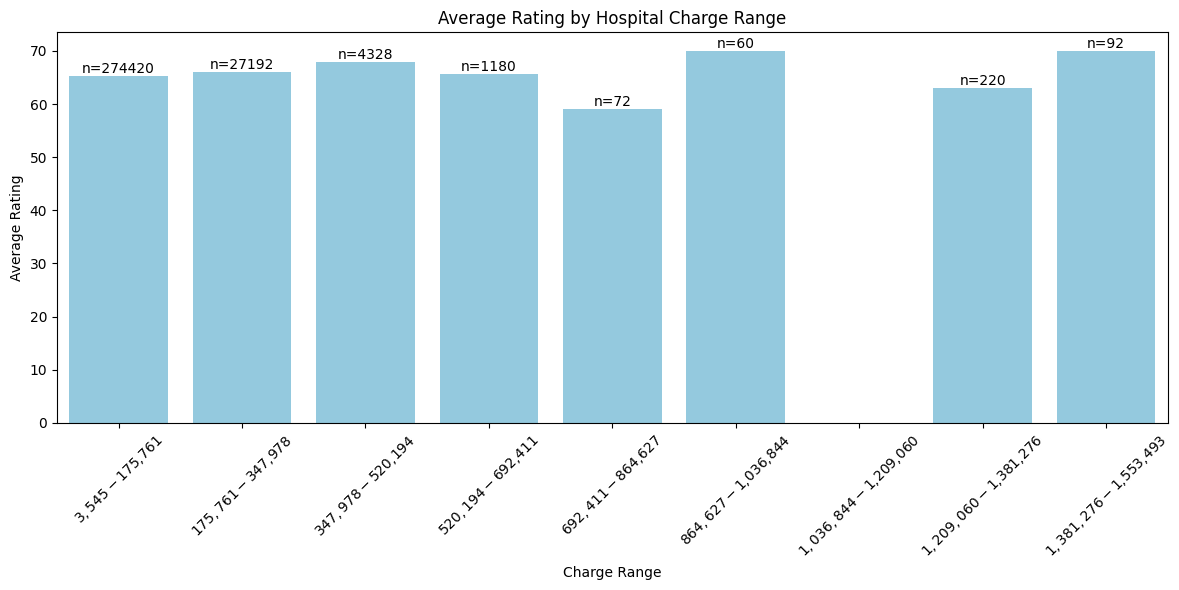

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = merged_df.copy()

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Check for missing values in our columns of interest
print("\nMissing values:")
print("Avg_Submtd_Cvrd_Chrg:", df['Avg_Submtd_Cvrd_Chrg'].isna().sum())
print("rating:", df['rating'].isna().sum())

# Filter to only rows with both charge and rating data
filtered_df = df.dropna(subset=['Avg_Submtd_Cvrd_Chrg', 'rating'])
print(f"\nFiltered dataset shape: {filtered_df.shape}")

# Basic statistics
print("\nAverage Submitted Covered Charge statistics:")
print(filtered_df['Avg_Submtd_Cvrd_Chrg'].describe())
print("\nRating statistics:")
print(filtered_df['rating'].describe())

# Calculate Pearson correlation
correlation, p_value = pearsonr(filtered_df['Avg_Submtd_Cvrd_Chrg'], filtered_df['rating'])
print(f"\nPearson correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret correlation strength
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

# Interpret direction
direction = "positive" if correlation > 0 else "negative"

print(f"\nInterpretation: There is a {strength} {direction} correlation between charges and ratings.")
if p_value < 0.05:
    print("This correlation is statistically significant (p < 0.05).")
else:
    print("This correlation is NOT statistically significant (p >= 0.05).")

# Create visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Submtd_Cvrd_Chrg', y='rating', data=filtered_df, alpha=0.6)
plt.title('Hospital Charges vs. Ratings')
plt.xlabel('Average Submitted Covered Charge ($)')
plt.ylabel('Rating')

# Add a trend line
sns.regplot(x='Avg_Submtd_Cvrd_Chrg', y='rating', data=filtered_df, 
            scatter=False, ci=None, line_kws={"color": "red"})

# Add correlation info to the plot
plt.annotate(f'Correlation: {correlation:.4f}\np-value: {p_value:.4f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('charge_vs_rating.png')
plt.show()

# Additional analysis: Bin the charges to see average rating by price range
# Create charge bins
bins = np.linspace(filtered_df['Avg_Submtd_Cvrd_Chrg'].min(), 
                   filtered_df['Avg_Submtd_Cvrd_Chrg'].max(), 
                   10)
labels = [f'${int(bins[i]):,}-${int(bins[i+1]):,}' for i in range(len(bins)-1)]

filtered_df['charge_bin'] = pd.cut(filtered_df['Avg_Submtd_Cvrd_Chrg'], bins=bins, labels=labels)

# Calculate average rating by price bin
avg_rating_by_bin = filtered_df.groupby('charge_bin')['rating'].agg(['mean', 'count']).reset_index()
print("\nAverage rating by charge bin:")
print(avg_rating_by_bin)

# Visualization of the binned data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='charge_bin', y='mean', data=avg_rating_by_bin, color='skyblue')
plt.title('Average Rating by Hospital Charge Range')
plt.xlabel('Charge Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for i, (_, row) in enumerate(avg_rating_by_bin.iterrows()):
    bar_plot.text(i, row['mean'], f"n={row['count']}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('avg_rating_by_charge_bin.png')
plt.show()

In [43]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.8 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 13.6 MB/s eta 0:00:00


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = merged_df.copy()

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nColumns related to quality and payment:", 
      [col for col in df.columns if any(term in col.lower() 
                                        for term in ['quality', 'value', 'payment', 'rating'])])

# Quality metrics might be in these columns based on your data:
quality_cols = ['rating', 'payment_measure_id', 'payment_measure_name', 'payment', 
                'value_of_care_display_id', 'value_of_care_display_name', 'value_of_care_category']

# Step 1: Analyze relationship between payment measures and quality metrics
# Filter to only rows with both payment and rating data
filtered_df = df.dropna(subset=['payment', 'rating'])
print(f"\nFiltered dataset with payment and rating data: {filtered_df.shape[0]} rows")

# Check correlation between payment and rating
if filtered_df.shape[0] > 1:
    corr, p_value = pearsonr(filtered_df['payment'], filtered_df['rating'])
    print(f"\nCorrelation between payment and rating: {corr:.4f} (p-value: {p_value:.4f})")

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='payment', y='rating', data=filtered_df)
    plt.title('Relationship Between Payment and Rating')
    plt.xlabel('Payment Amount')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.savefig('payment_vs_rating.png')
    plt.close()

# Step 2: Analyze value of care categories against payment categories
# Check if data has value_of_care_category and payment_category
if 'value_of_care_category' in df.columns and 'payment_category' in df.columns:
    # Create a crosstab of value of care vs payment categories
    care_payment_crosstab = pd.crosstab(
        df['value_of_care_category'], 
        df['payment_category'], 
        values=df['rating'], 
        aggfunc='mean'
    )
    
    print("\nAverage rating by value of care and payment categories:")
    print(care_payment_crosstab)
    
    # Visualize the crosstab as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(care_payment_crosstab, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
    plt.title('Average Rating by Value of Care and Payment Categories')
    plt.tight_layout()
    plt.savefig('care_payment_heatmap.png')
    plt.close()

# Step 3: Multivariate analysis of factors affecting quality
# Select relevant columns for regression
if all(col in df.columns for col in ['rating', 'payment', 'Tot_Dschrgs']):
    model_df = df.dropna(subset=['rating', 'payment', 'Tot_Dschrgs'])
    
    # Add RUCA (rural/urban) as a numeric predictor if available
    if 'Rndrng_Prvdr_RUCA' in model_df.columns:
        model_df = model_df.dropna(subset=['Rndrng_Prvdr_RUCA'])
        X = model_df[['payment', 'Tot_Dschrgs', 'Rndrng_Prvdr_RUCA']]
    else:
        X = model_df[['payment', 'Tot_Dschrgs']]
    
    # Add constant term
    X = sm.add_constant(X)
    y = model_df['rating']
    
    # Fit regression model
    model = sm.OLS(y, X).fit()
    print("\nRegression Results for Factors Affecting Quality Rating:")
    print(model.summary().tables[1])  # Print coefficient table
    
    # Create predicted vs actual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(model.predict(X), y, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Actual Rating')
    plt.title('Predicted vs Actual Quality Ratings')
    plt.tight_layout()
    plt.savefig('predicted_vs_actual.png')
    plt.close()

# Step 4: Cluster Analysis to identify hospital performance patterns
analysis_cols = []
for col in ['rating', 'payment', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt']:
    if col in df.columns:
        analysis_cols.append(col)

if len(analysis_cols) >= 2:
    # Filter and prepare data
    cluster_df = df[analysis_cols].dropna()
    print(f"\nClustering dataset shape: {cluster_df.shape}")
    
    if cluster_df.shape[0] > 10:  # Only proceed if we have enough data
        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(cluster_df)
        
        # Determine optimal number of clusters using elbow method
        inertia = []
        k_range = range(1, min(11, cluster_df.shape[0]))
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_data)
            inertia.append(kmeans.inertia_)
        
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertia, 'o-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.savefig('elbow_method.png')
        plt.close()
        
        # Choose k (this is a simplified approach - usually you'd examine the plot)
        k = 3  # Example - in practice, select based on the elbow point
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_df['cluster'] = kmeans.fit_predict(scaled_data)
        
        # Analyze clusters
        cluster_analysis = cluster_df.groupby('cluster').mean()
        print("\nCluster Analysis - Average Metrics by Cluster:")
        print(cluster_analysis)
        
        # Visualize clusters using first two dimensions
        plt.figure(figsize=(12, 8))
        if len(analysis_cols) >= 2:
            scatter = sns.scatterplot(
                x=analysis_cols[0], 
                y=analysis_cols[1], 
                hue='cluster', 
                palette='viridis',
                data=cluster_df
            )
            plt.title(f'Hospital Clusters by {analysis_cols[0]} and {analysis_cols[1]}')
            plt.tight_layout()
            plt.savefig('hospital_clusters.png')
            plt.close()

# Step 5: Geographic analysis of quality measures
if all(col in df.columns for col in ['Rndrng_Prvdr_State_Abrvtn', 'rating']):
    # State-level quality metrics
    state_quality = df.groupby('Rndrng_Prvdr_State_Abrvtn')['rating'].agg(['mean', 'count']).reset_index()
    state_quality = state_quality.sort_values('mean', ascending=False)
    
    # Filter to states with sufficient data
    min_hospitals = 5  # Minimum hospitals per state to include
    state_quality_filtered = state_quality[state_quality['count'] >= min_hospitals]
    
    print("\nAverage Quality Ratings by State (Top 10):")
    print(state_quality_filtered.head(10))
    
    # Create bar chart
    plt.figure(figsize=(12, 8))
    chart = sns.barplot(x='Rndrng_Prvdr_State_Abrvtn', y='mean', data=state_quality_filtered.head(15))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    
    # Add hospital count as labels
    for i, p in enumerate(chart.patches):
        chart.annotate(f"n={state_quality_filtered.iloc[i]['count']}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'bottom', fontsize=9)
    
    plt.title('Average Hospital Quality Rating by State')
    plt.xlabel('State')
    plt.ylabel('Average Rating')
    plt.tight_layout()
    plt.savefig('quality_by_state.png')
    plt.close()

# Step 6: Rural vs Urban quality analysis
if 'Rndrng_Prvdr_RUCA_Desc' in df.columns and 'rating' in df.columns:
    # Quality metrics by rural/urban classification
    rural_urban_quality = df.groupby('Rndrng_Prvdr_RUCA_Desc')['rating'].agg(['mean', 'std', 'count']).reset_index()
    
    print("\nQuality Rating by Rural/Urban Classification:")
    print(rural_urban_quality)
    
    # Create bar chart with error bars
    plt.figure(figsize=(12, 6))
    
    # Use only locations with sufficient data
    rural_urban_filtered = rural_urban_quality[rural_urban_quality['count'] >= 5]
    
    # Create bar chart
    bar = sns.barplot(x='Rndrng_Prvdr_RUCA_Desc', y='mean', data=rural_urban_filtered)
    
    # Add error bars
    x_coords = range(len(rural_urban_filtered))
    plt.errorbar(
        x=x_coords, 
        y=rural_urban_filtered['mean'], 
        yerr=rural_urban_filtered['std'],
        fmt='none', 
        c='black', 
        capsize=5
    )
    
    # Add count labels
    for i, p in enumerate(bar.patches):
        bar.annotate(f"n={rural_urban_filtered.iloc[i]['count']}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'bottom', fontsize=9)
    
    plt.title('Average Hospital Quality Rating by Rural/Urban Classification')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('quality_by_rural_urban.png')
    plt.close()

print("\nQuality of care analysis complete! Check the generated PNG files for visualizations.")

Dataset shape: (522260, 50)

Columns related to quality and payment: ['payment_measure_id', 'payment_measure_name', 'payment_category', 'payment', 'payment_footnote', 'value_of_care_display_id', 'value_of_care_display_name', 'value_of_care_category', 'value_of_care_footnote', 'rating']

Filtered dataset with payment and rating data: 271537 rows

Correlation between payment and rating: -0.0398 (p-value: 0.0000)

Average rating by value of care and payment categories:
payment_category                           Greater Than the National Average Payment  \
value_of_care_category                                                                 
Average Complications and Average Payment                                        NaN   
Average Complications and Higher Payment                                   59.218357   
Average Complications and Lower Payment                                          NaN   
Average Mortality and Average Payment                                            NaN   
A

C:\Users\darsh\AppData\Local\Temp\ipykernel_21792\389974569.py:172: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)



Quality of care analysis complete! Check the generated PNG files for visualizations.


C:\Users\darsh\AppData\Local\Temp\ipykernel_21792\389974569.py:224: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)